## Analyzing visual differences between CGTNGraphics vs. NBCNewsGraphics 

In [62]:
import os
import pandas as pd
import numpy as np
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [9]:
# load the data
cgtn_df = pd.read_csv('../../results/news_graphics/CGTNGraphics/features.csv')
nbc_df = pd.read_csv('../../results/news_graphics/NBCNewsGraphics/features.csv')

# add labels and combine
tmp_cgtn = cgtn_df.copy()
tmp_cgtn['source'] = ['CGTN'] * cgtn_df.shape[0]
tmp_nbc = nbc_df.copy()
tmp_nbc['source'] = ['NBC'] * nbc_df.shape[0]

combined_df = pd.concat([tmp_cgtn, tmp_nbc], ignore_index=True)

In [29]:
# split the data into feature, labels
X = combined_df[['similarity', 'complexity', 'anisotropy', 'birkoff_measure', 'fractal_dimension', 'fourier_slope']]
y = combined_df['source']

# decision tree with max_depth=3
clf = tree.DecisionTreeClassifier(max_depth=3)

# perform 5-fold cross validation and report the average accuracy
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print(f'Average accuracy across 5-fold validation is: {np.average(scores):.2f}')

Average accuracy across 5-fold validation is: 0.84


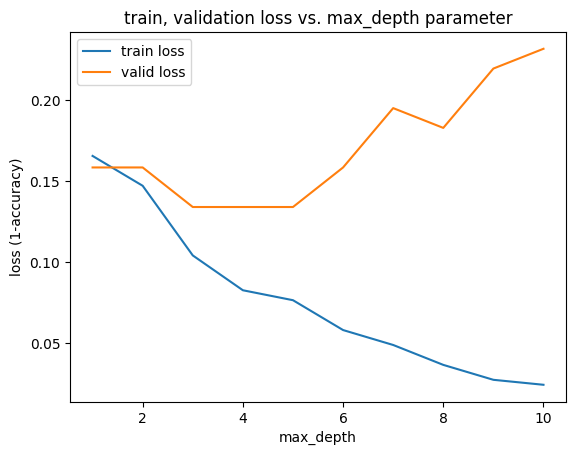

In [46]:
# split into train-test (20% for test)
X_train, X_test, y_train, y_test = train_test_split(combined_df.drop(columns=['image', 'source']), combined_df['source'], test_size=0.2, random_state=42)

train_accuracies, valid_accuracies = [], []

# keep changing the depth, 
for max_depth in range(1, 11): 
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_accuracies.append(1-accuracy_score(y_train, clf.predict(X_train)))
    valid_accuracies.append(1-accuracy_score(y_test, clf.predict(X_test)))

plt.title('train, validation loss vs. max_depth parameter')
plt.xlabel('max_depth')
plt.ylabel('loss (1-accuracy)')
plt.plot(range(1, 11), train_accuracies, label='train loss')
plt.plot(range(1, 11), valid_accuracies, label = 'valid loss')
plt.legend()

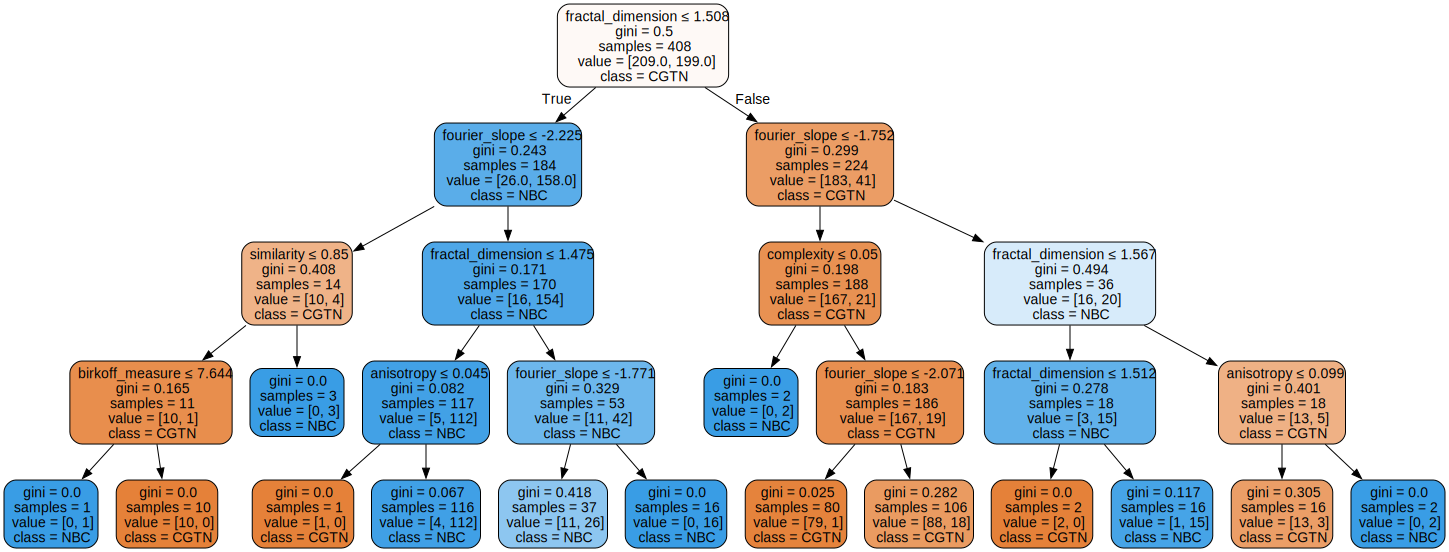

In [47]:
# decision tree with max_depth=4
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X, y)

# visualize the tree
dot_data = tree.export_graphviz(clf,
                  feature_names=['similarity', 'complexity', 'anisotropy', 'birkoff_measure', 'fractal_dimension', 'fourier_slope'],
                  class_names=list(clf.classes_),
                  filled=True, rounded=True,
                  special_characters=True,
                  out_file=None,
                  )

graph = graphviz.Source(dot_data)
graph

Text(0.5, 1.0, 'feature importances for classifying CGTN vs. NBC data graphics')

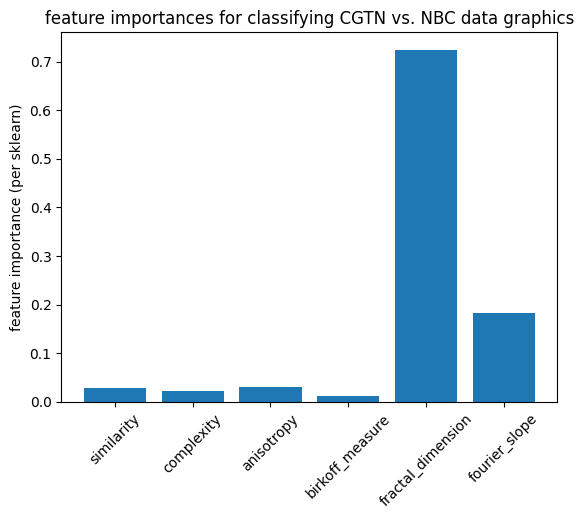

In [52]:
# show the feature importances
plt.bar(['similarity', 'complexity', 'anisotropy', 'birkoff_measure', 'fractal_dimension', 'fourier_slope'], clf.feature_importances_)
plt.xticks(rotation=45)
plt.ylabel('feature importance (per sklearn)')
plt.title('feature importances for classifying CGTN vs. NBC data graphics')

In [58]:
# find the top 10 and bottom 10 for fractal dimension, fourier slope
lowest_fractal = combined_df.sort_values(by='fractal_dimension')[['image', 'source']].head(10)
highest_fractal = combined_df.sort_values(by='fractal_dimension', ascending=False)[['image', 'source']].head(10)

lowest_fourier = combined_df.sort_values(by='fourier_slope')[['image', 'source']].head(10)
highest_fourier = combined_df.sort_values(by='fourier_slope', ascending=False)[['image', 'source']].head(10)

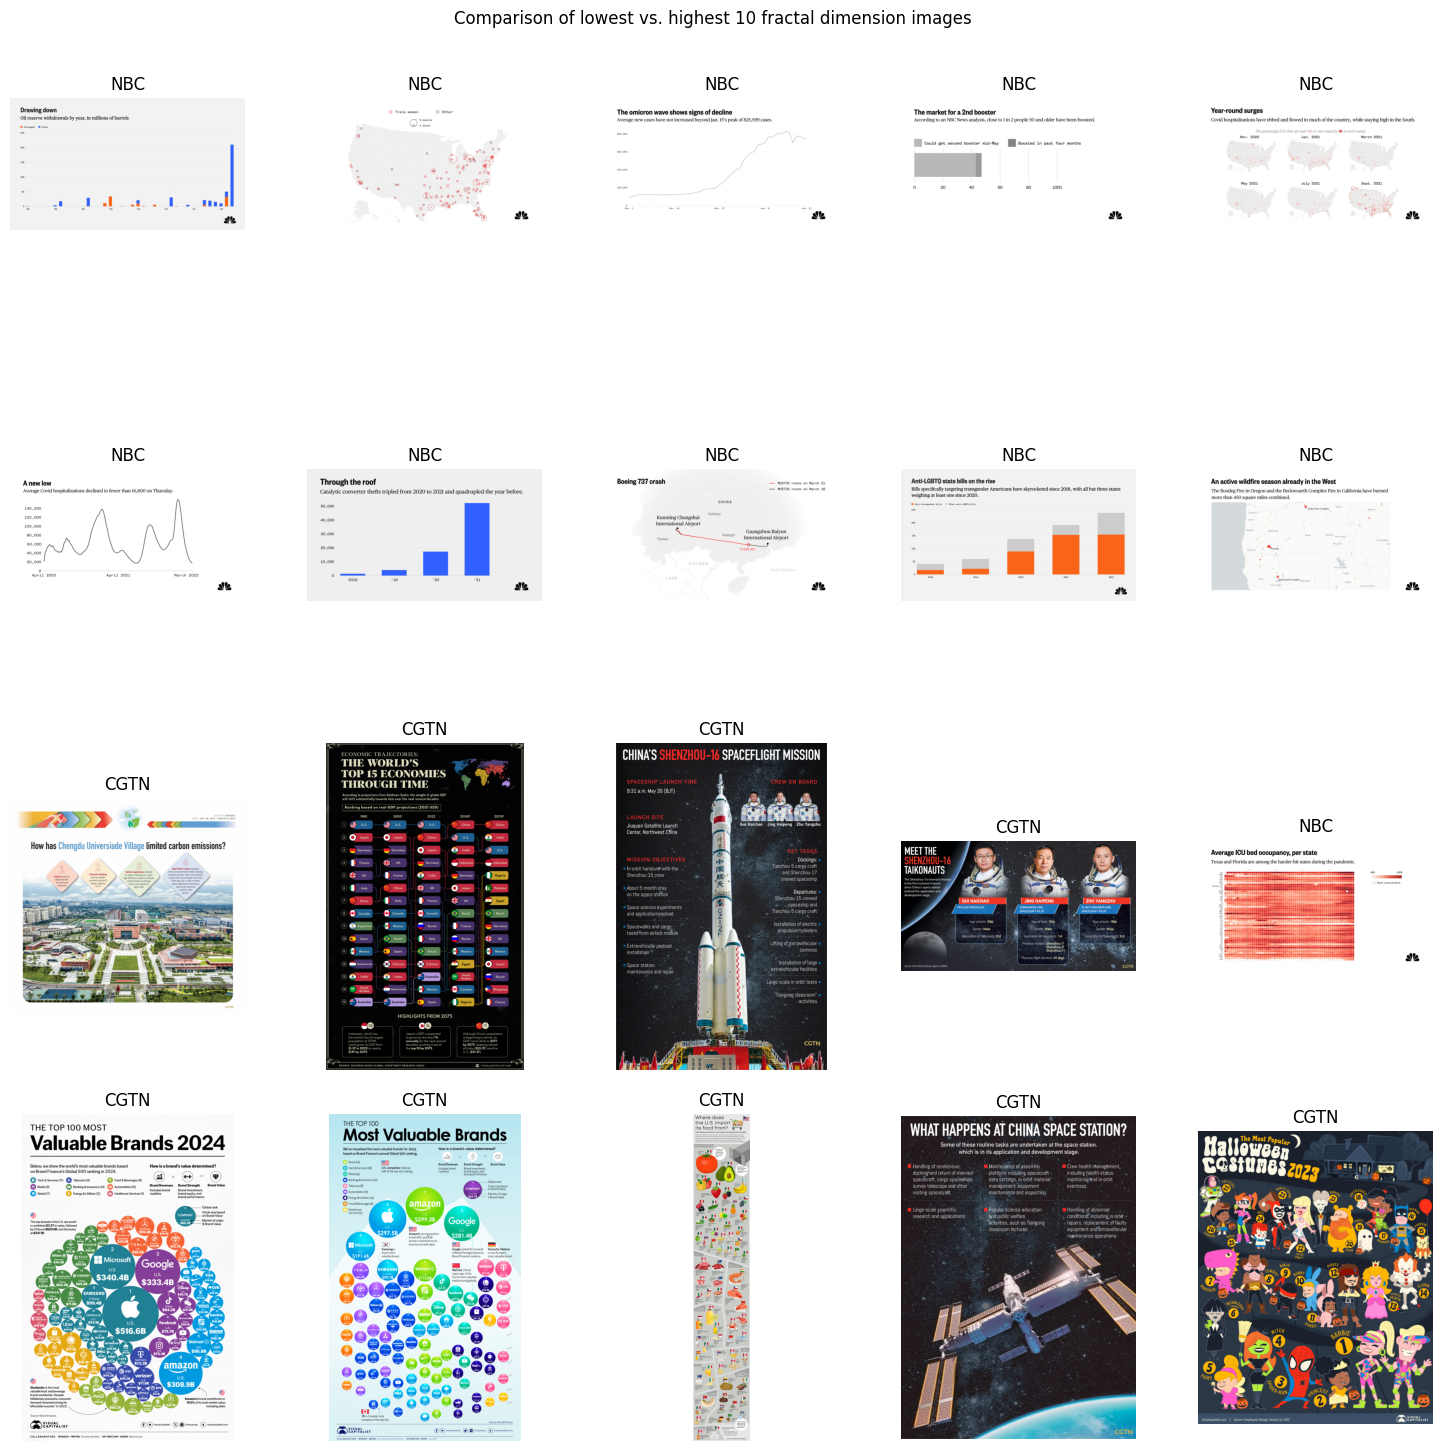

In [78]:
f, axs = plt.subplots(4, 5, figsize=(15, 15))
plt.tight_layout()
f.suptitle('Comparison of lowest vs. highest 10 fractal dimension images')

source_map = {'CGTN': '../../results/news_graphics/CGTNGraphics',
              'NBC': '../../results/news_graphics/NBCNewsGraphics'}

count = 0

for index, row in lowest_fractal.iterrows():
    img_file = row['image']
    img_dir = source_map[row['source']]
    
    imgs = [i for i in os.listdir(img_dir) if i.split(".")[0] == img_file]
    assert len(imgs)==1
    axs[count//5, count%5].imshow(plt.imread(f'{img_dir}/{imgs[0]}'))
    axs[count//5, count%5].axis('off')
    axs[count//5, count%5].set_title(row['source'])
    count += 1
    
for index, row in highest_fractal.iterrows():
    img_file = row['image']
    img_dir = source_map[row['source']]
    
    imgs = [i for i in os.listdir(img_dir) if i.split(".")[0] == img_file]
    assert len(imgs)==1
    axs[count//5, count%5].imshow(plt.imread(f'{img_dir}/{imgs[0]}'))
    axs[count//5, count%5].axis('off')
    axs[count//5, count%5].set_title(row['source'])
    count += 1

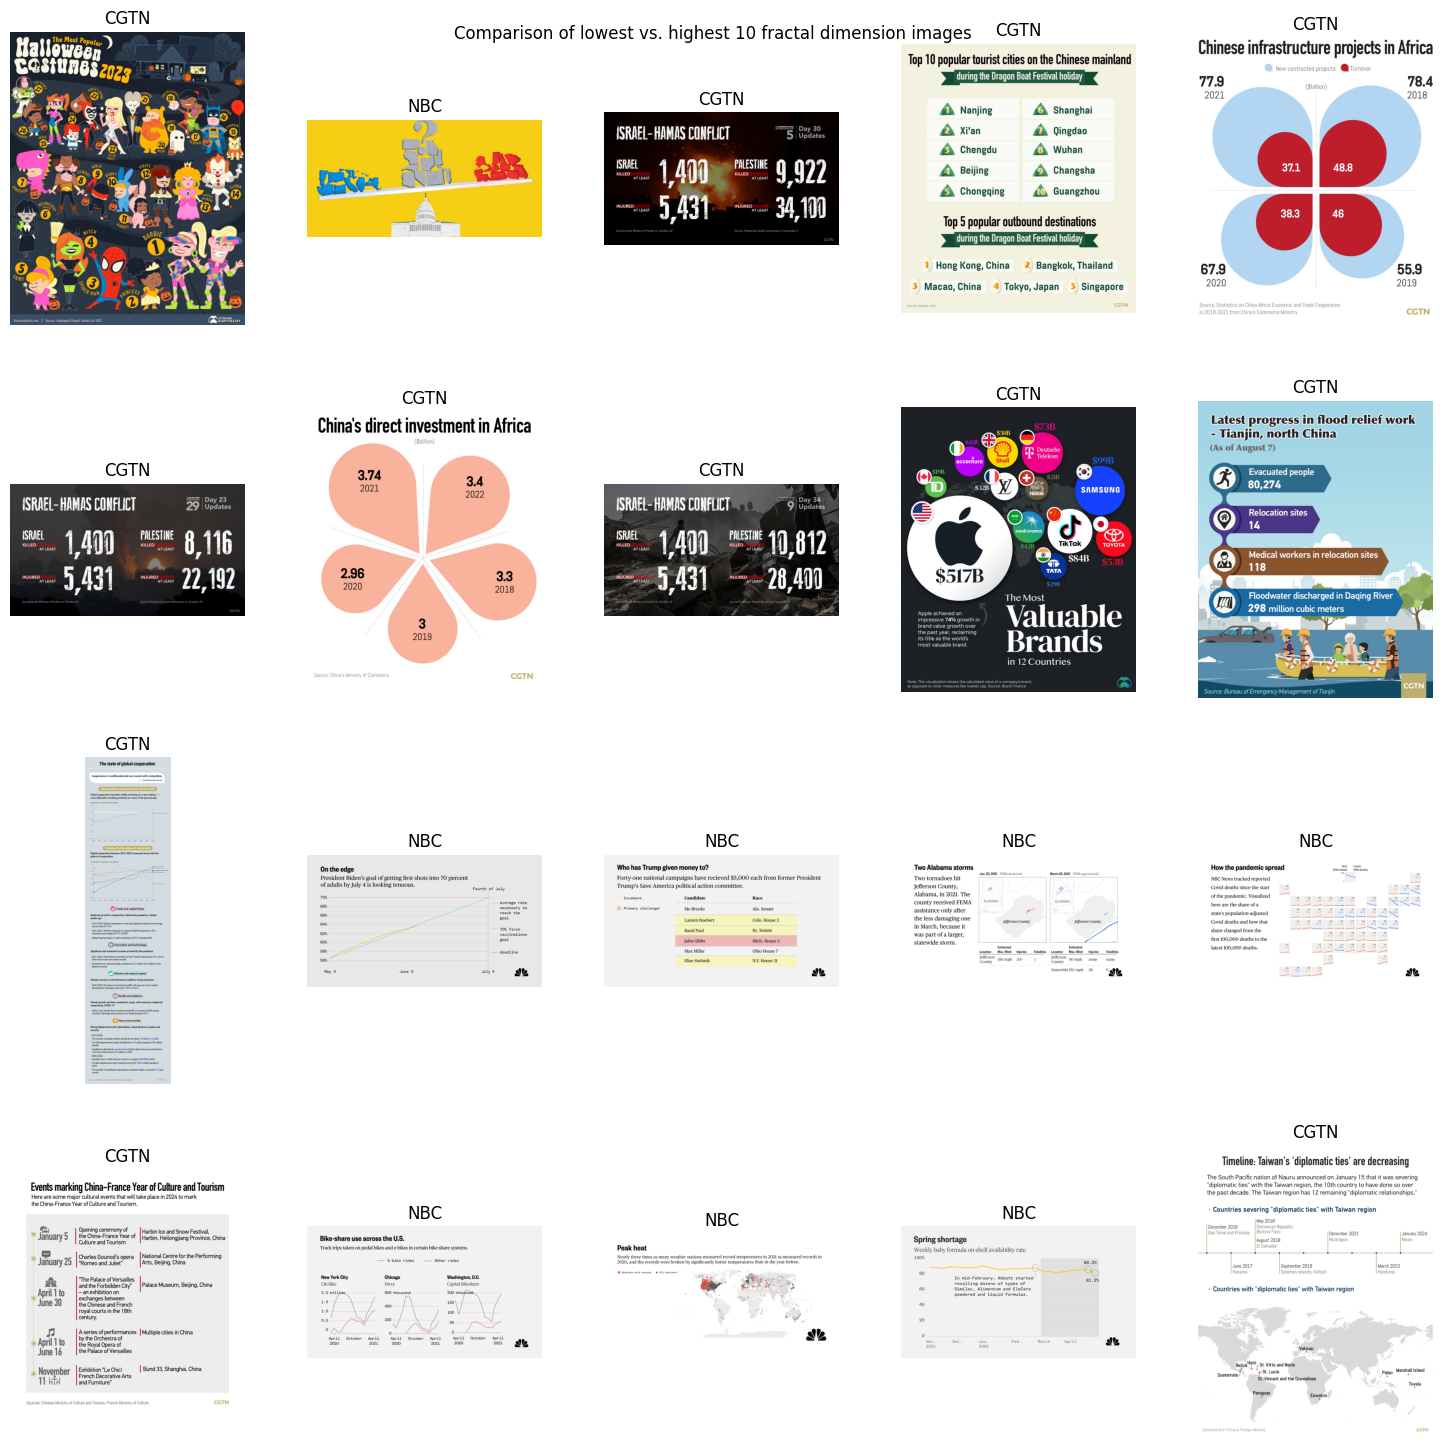

In [79]:
f, axs = plt.subplots(4, 5, figsize=(15, 15))
plt.tight_layout()
f.suptitle('Comparison of lowest vs. highest 10 fractal dimension images')

source_map = {'CGTN': '../../results/news_graphics/CGTNGraphics',
              'NBC': '../../results/news_graphics/NBCNewsGraphics'}

count = 0

for index, row in lowest_fourier.iterrows():
    img_file = row['image']
    img_dir = source_map[row['source']]
    
    imgs = [i for i in os.listdir(img_dir) if i.split(".")[0] == img_file]
    assert len(imgs)==1
    axs[count//5, count%5].imshow(plt.imread(f'{img_dir}/{imgs[0]}'))
    axs[count//5, count%5].axis('off')
    axs[count//5, count%5].set_title(row['source'])
    count += 1
    
for index, row in highest_fourier.iterrows():
    img_file = row['image']
    img_dir = source_map[row['source']]
    
    imgs = [i for i in os.listdir(img_dir) if i.split(".")[0] == img_file]
    assert len(imgs)==1
    axs[count//5, count%5].imshow(plt.imread(f'{img_dir}/{imgs[0]}'))
    axs[count//5, count%5].axis('off')
    axs[count//5, count%5].set_title(row['source'])
    count += 1

## Prepositions vs. Numbers in Text

In [108]:
import cv2
import nltk
from nltk.tokenize import word_tokenize
from PIL import Image
from string import punctuation
import pytesseract

# for POS tagging
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

def img_to_text(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    words = word_tokenize(pytesseract.image_to_string(img))
    words = [s for s in words if s.isalnum()]
    words = [i.lower() for i in words]
    
    tagged_words = []
    numbers = []
    prepositions = []
    
    # tag numbers in words
    for word in words:
        if any(char.isdigit() for char in word):
            tagged_words.append('NUM')
            numbers.append(word)
            
        elif pos_tag([word])[0][1] == 'IN':
            tagged_words.append('PREPOSITION')
            prepositions.append(word)
            
        else:
            tagged_words.append('OTHER')
    
    return tagged_words, numbers, prepositions

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/marvinlimpijankit/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [109]:
input_dirs = ['../../results/news_graphics/CGTNGraphics', '../../results/news_graphics/NBCNewsGraphics']

out = []

for input_dir in input_dirs:
    source = input_dir.split("/")[-1]
    
    for file in [i for i in os.listdir(input_dir) if i[-5:]=='.jpeg' or i[-4:]=='.jpg' or i[-4:]=='.png']:
        img_path = f'{input_dir}/{file}'
        tagged_words, numbers, prepositions = img_to_text(img_path)
        image = file.split(".")[0]
        
        num_numbers = len([i for i in tagged_words if i=='NUM'])
        num_preps = len([i for i in tagged_words if i=='PREPOSITION'])
        num_others = len([i for i in tagged_words if i not in ['NUM', 'PREPOSITION']])
        num_total = len(tagged_words)
        
        out.append([source, image, num_numbers, ",".join(numbers), num_preps, ",".join(prepositions), num_others, num_total])

In [112]:
df = pd.DataFrame(out, columns=['source', 'image', 'num_numbers', 'numbers', 'num_preps', 'preps', 'num_others', 'num_total'])
df.to_csv('../../results/news_graphics/word_statistics.csv', index=False)

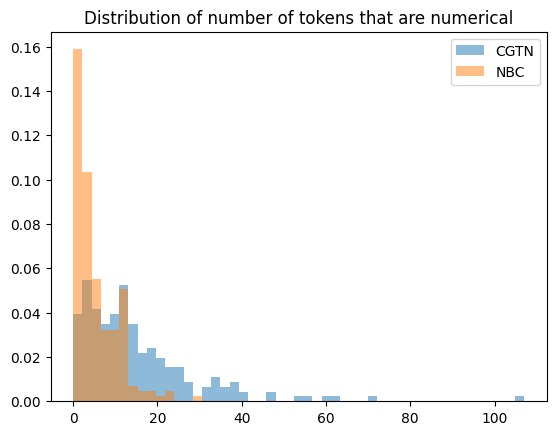

In [126]:
bins = np.linspace(0, max(max(df[df['source']=='CGTNGraphics']['num_numbers']), max(df[df['source']=='NBCNewsGraphics']['num_numbers'])), 50)

plt.hist(df[df['source']=='CGTNGraphics']['num_numbers'], label='CGTN', density=True, alpha=0.5, bins=bins)
plt.hist(df[df['source']=='NBCNewsGraphics']['num_numbers'], label='NBC', density=True, alpha=0.5, bins=bins)
plt.title('Distribution of number of tokens that are numerical')
plt.legend()

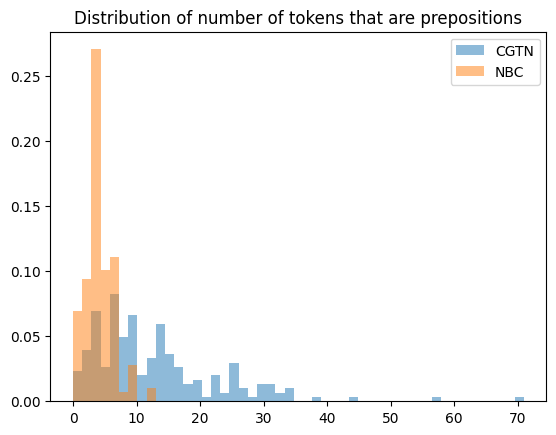

In [127]:
bins = np.linspace(0, max(max(df[df['source']=='CGTNGraphics']['num_preps']), max(df[df['source']=='NBCNewsGraphics']['num_preps'])), 50)

plt.hist(df[df['source']=='CGTNGraphics']['num_preps'], label='CGTN', density=True, alpha=0.5, bins=bins)
plt.hist(df[df['source']=='NBCNewsGraphics']['num_preps'], label='NBC', density=True, alpha=0.5, bins=bins)
plt.title('Distribution of number of tokens that are prepositions')
plt.legend()

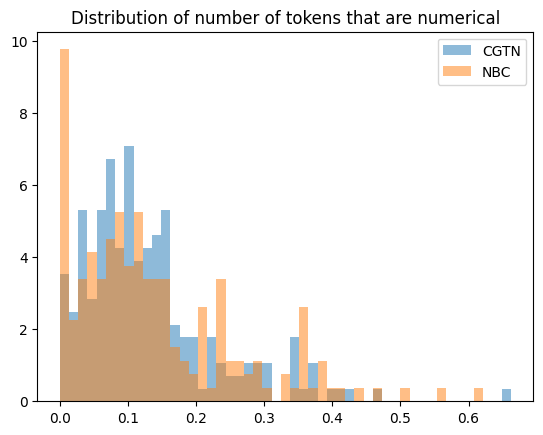

In [129]:
df['num_numbers_normalized'] = df['num_numbers']/df['num_total']

bins = np.linspace(0, max(max(df[df['source']=='CGTNGraphics']['num_numbers_normalized']), max(df[df['source']=='NBCNewsGraphics']['num_numbers_normalized'])), 50)

plt.hist(df[df['source']=='CGTNGraphics']['num_numbers_normalized'], label='CGTN', density=True, alpha=0.5, bins=bins)
plt.hist(df[df['source']=='NBCNewsGraphics']['num_numbers_normalized'], label='NBC', density=True, alpha=0.5, bins=bins)
plt.title('Distribution of number of tokens that are numerical')
plt.legend()

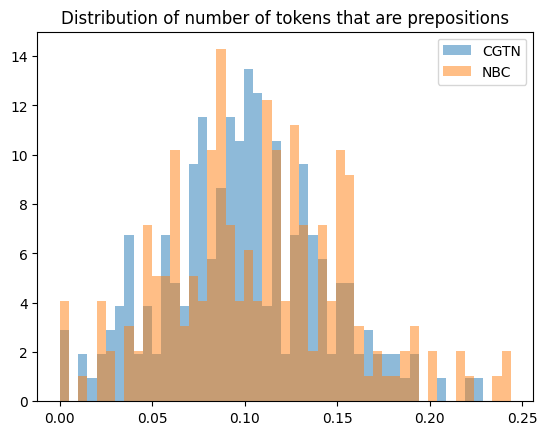

In [130]:
df['num_preps_normalized'] = df['num_preps']/df['num_total']

bins = np.linspace(0, max(max(df[df['source']=='CGTNGraphics']['num_preps_normalized']), max(df[df['source']=='NBCNewsGraphics']['num_preps_normalized'])), 50)

plt.hist(df[df['source']=='CGTNGraphics']['num_preps_normalized'], label='CGTN', density=True, alpha=0.5, bins=bins)
plt.hist(df[df['source']=='NBCNewsGraphics']['num_preps_normalized'], label='NBC', density=True, alpha=0.5, bins=bins)
plt.title('Distribution of number of tokens that are prepositions')
plt.legend()

In [143]:
cgtn_preps = df[df['source']=='CGTNGraphics']['preps'].sum()
cgtn_preps = cgtn_preps.split(",")

nbc_preps = df[df['source']=='NBCNewsGraphics']['preps'].sum()
nbc_preps = nbc_preps.split(",")

Text(0.5, 1.0, 'CGTN: most common prepositions')

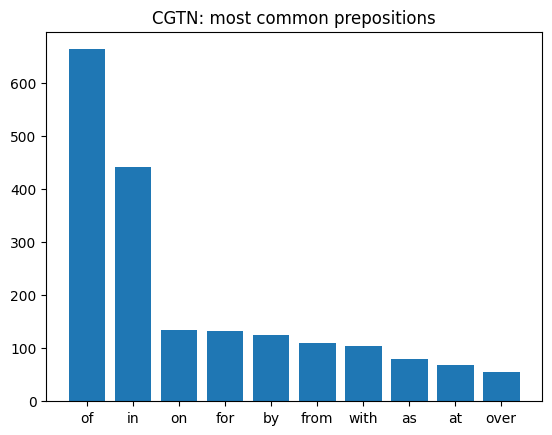

In [147]:
from collections import Counter

cgtn_common = Counter(cgtn_preps).most_common()[:10]

plt.bar([i[0] for i in cgtn_common], [i[1] for i in cgtn_common])
plt.title('CGTN: most common prepositions')

Text(0.5, 1.0, 'NBC: most common preposition')

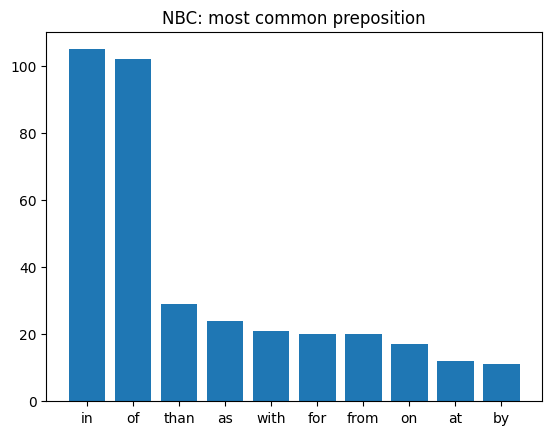

In [146]:
from collections import Counter

nbc_common = Counter(nbc_preps).most_common()[:10]

plt.bar([i[0] for i in nbc_common], [i[1] for i in nbc_common])
plt.title('NBC: most common preposition')